https://datahack.analyticsvidhya.com/contest/machine-learning-starter-program-hackathon/

#### Importing Libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime

In [2]:
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(12,8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing Datasets

In [0]:
train=pd.read_csv('train_HK6lq50.csv')
test=pd.read_csv('test_wF0Ps6O.csv')
sample=pd.read_csv('sample_submission_vaSxamm.csv')

#### Knowing about data's

In [4]:
train.shape,test.shape

((73147, 16), (31349, 15))

In [5]:
train.head(3)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1


In [6]:
train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [7]:
train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [8]:
train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

#### Missing Value treatment

In [10]:
Missing_Variables=train.columns[train.isnull().any()]
Missing_Variables

Index(['age', 'trainee_engagement_rating'], dtype='object')

In [0]:
for object in Missing_Variables:
    train[object].fillna(train[object].mode()[0], inplace=True)

#### EDA

##### Target Exploration

In [12]:
train['is_pass'].value_counts(normalize=True)

1    0.695408
0    0.304592
Name: is_pass, dtype: float64

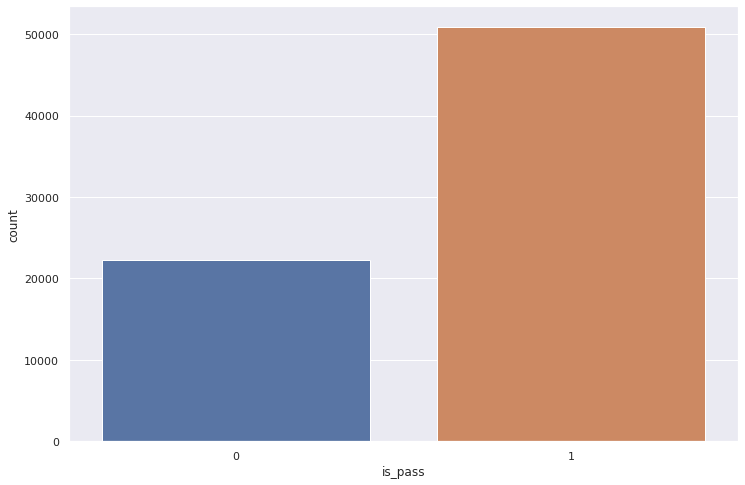

In [13]:
sns.countplot(train['is_pass'])

##### Univariate Analysis

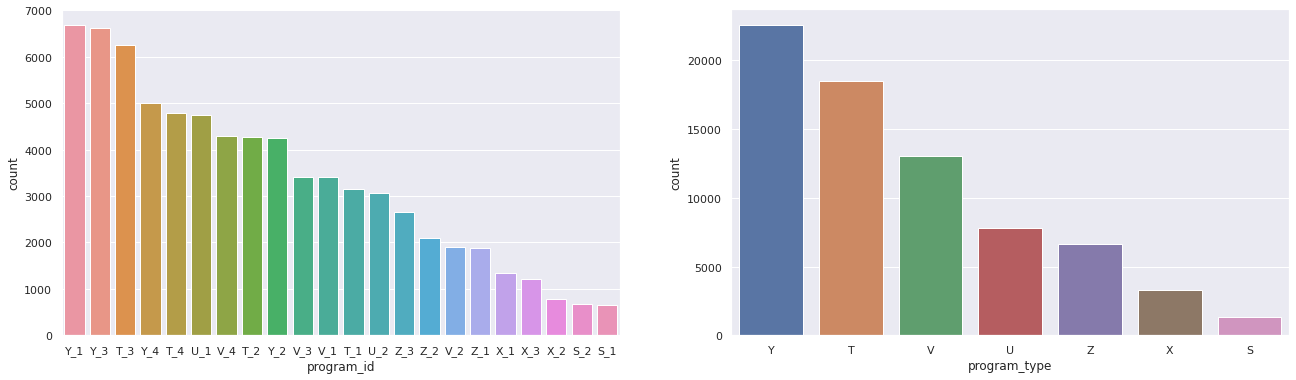

In [14]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.countplot(train['program_id'],order = train['program_id'].value_counts().index)
plt.subplot(122)
sns.countplot(train['program_type'],order = train['program_type'].value_counts().index)

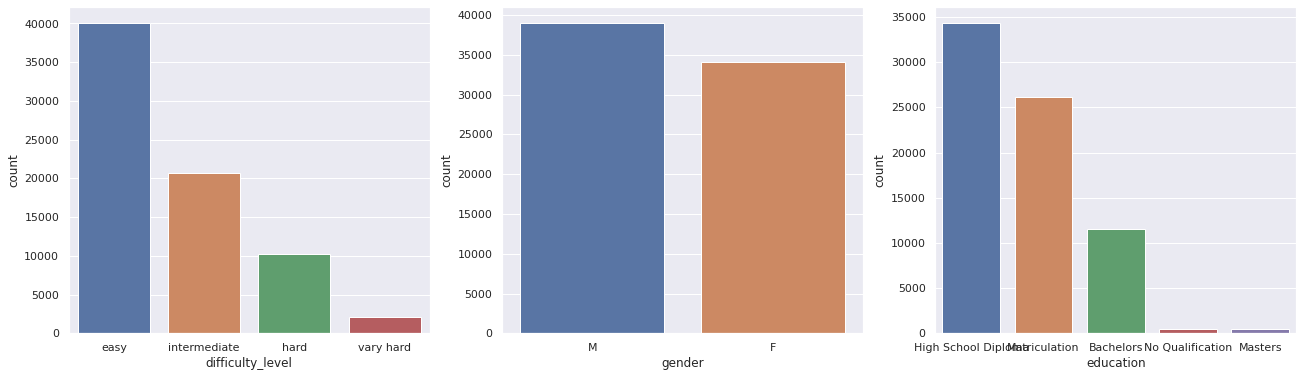

In [15]:
plt.figure(figsize=(22, 6))
plt.subplot(131)
sns.countplot(train['difficulty_level'],order = train['difficulty_level'].value_counts().index)
plt.subplot(132)
sns.countplot(train['gender'],order = train['gender'].value_counts().index)
plt.subplot(133)
sns.countplot(train['education'],order = train['education'].value_counts().index)

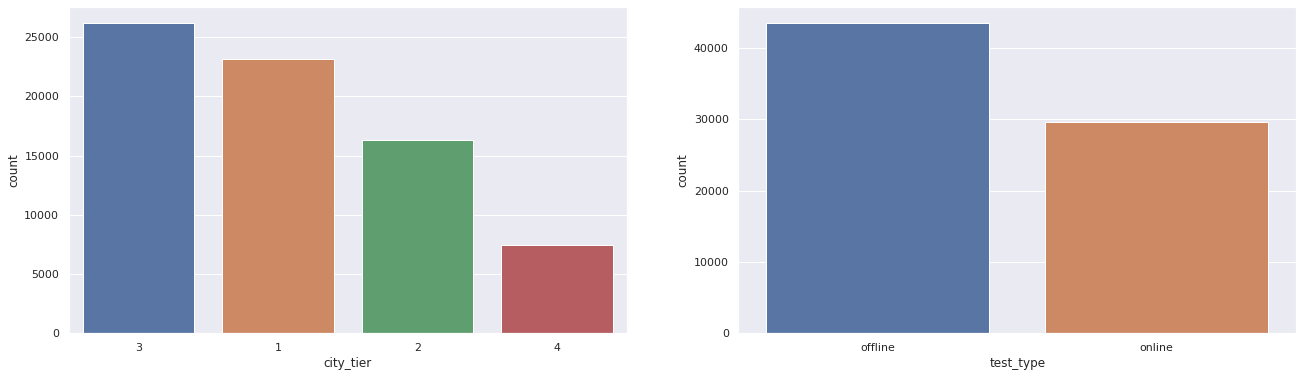

In [16]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.countplot(train['city_tier'],order = train['city_tier'].value_counts().index)
plt.subplot(122)
sns.countplot(train['test_type'],order = train['test_type'].value_counts().index)

##### Bivariate Analysis

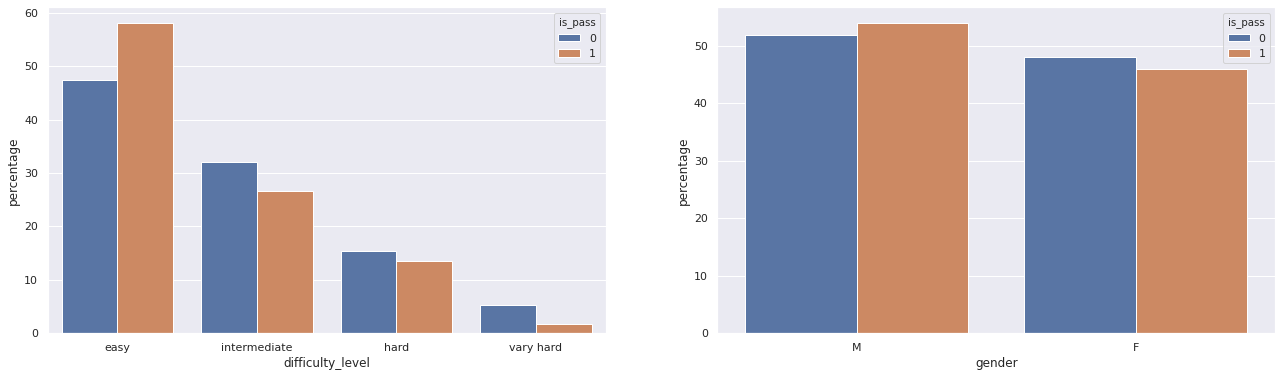

In [17]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
city_tier_counts = (train.groupby(['is_pass'])['difficulty_level'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="difficulty_level", y="percentage", hue="is_pass", data=city_tier_counts)
plt.subplot(122)
test_type_counts = (train.groupby(['is_pass'])['gender'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="gender", y="percentage", hue="is_pass", data=test_type_counts)

##### Other Methods
x,y = 'difficulty_level', 'is_pass'
(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

x,y = 'gender', 'is_pass'
(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

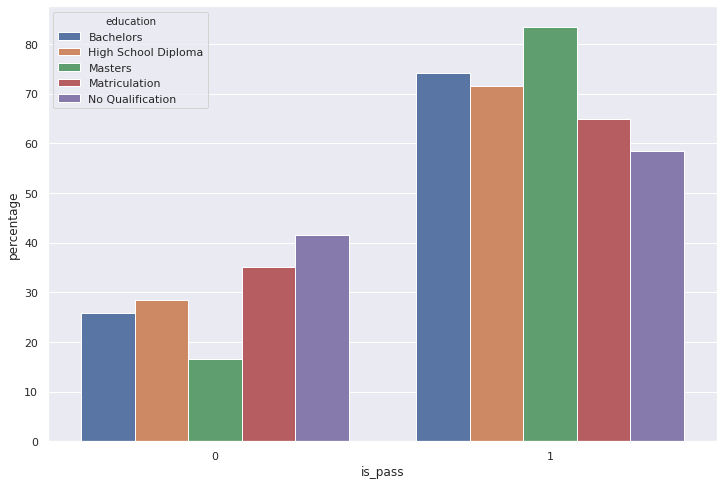

In [18]:
education_counts = (train.groupby(['education'])['is_pass'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('education'))
sns.barplot(x="is_pass", y="percentage", hue="education", data=education_counts)

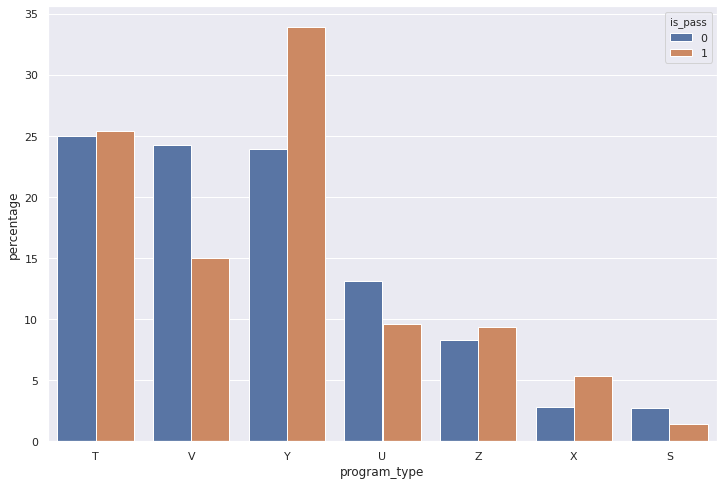

In [19]:
education_counts = (train.groupby(['is_pass'])['program_type'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="program_type", y="percentage", hue="is_pass", data=education_counts)

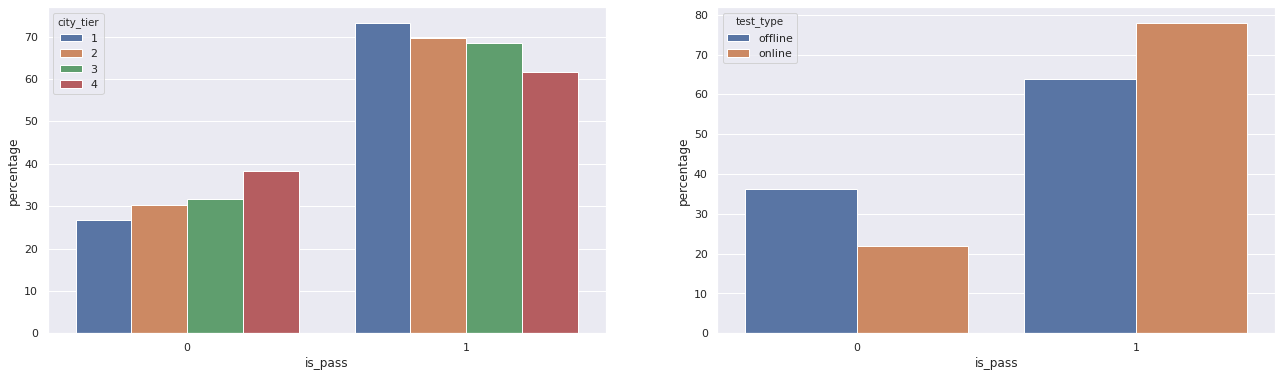

In [20]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
city_tier_counts = (train.groupby(['city_tier'])['is_pass'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('city_tier'))
sns.barplot(x="is_pass", y="percentage", hue="city_tier", data=city_tier_counts)
plt.subplot(122)
test_type_counts = (train.groupby(['test_type'])['is_pass'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('test_type'))
sns.barplot(x="is_pass", y="percentage", hue="test_type", data=test_type_counts)

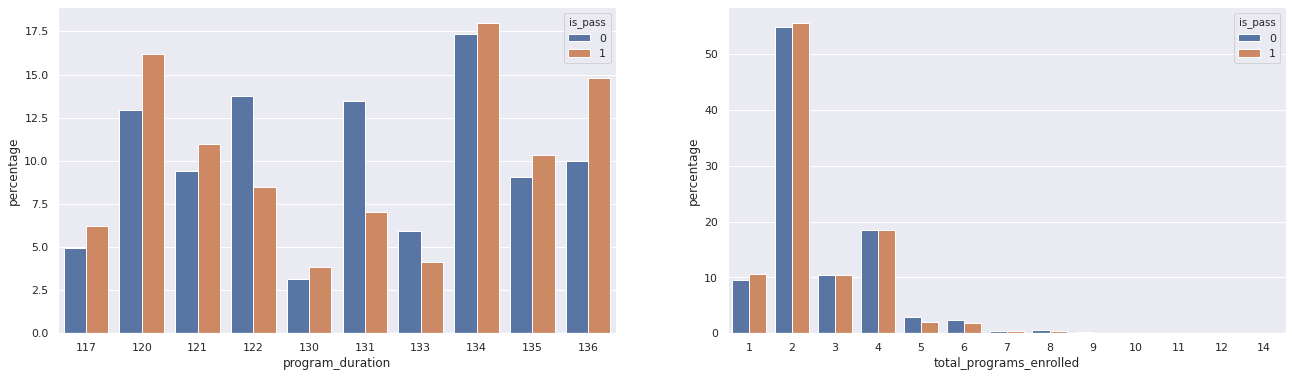

In [21]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
city_tier_counts = (train.groupby(['is_pass'])['program_duration'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="program_duration", y="percentage", hue="is_pass", data=city_tier_counts)
plt.subplot(122)
test_type_counts = (train.groupby(['is_pass'])['total_programs_enrolled'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="total_programs_enrolled", y="percentage", hue="is_pass", data=test_type_counts)

##### Co-Relation Matrix

In [22]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,45.0,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [23]:
train.corr()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
program_duration,1.000000,0.204855,0.148651,-0.022368,-0.021748,-0.010128,0.098739,0.003545
test_id,0.204855,1.000000,0.148945,-0.001891,0.011373,-0.134198,0.323929,0.074568
trainee_id,0.148651,0.148945,1.000000,-0.010190,0.043099,-0.074630,0.031083,0.035900
city_tier,-0.022368,-0.001891,-0.010190,1.000000,-0.039735,0.016746,-0.052688,-0.068663
age,-0.021748,0.011373,0.043099,-0.039735,1.000000,-0.017640,0.140556,0.052307
total_programs_enrolled,-0.010128,-0.134198,-0.074630,0.016746,-0.017640,1.000000,0.083631,-0.031695
trainee_engagement_rating,0.098739,0.323929,0.031083,-0.052688,0.140556,0.083631,1.000000,0.197612
is_pass,0.003545,0.074568,0.035900,-0.068663,0.052307,-0.031695,0.197612,1.000000


#### Feature Engineering

In [24]:
train = pd.concat([train,test],axis=0)
train.shape

(104496, 16)

In [0]:
train['program_Alfa']=train['program_id'].apply(lambda x: x.split('_')[1]).astype(int)

In [0]:
train['program_duration']=train.program_duration.astype(str)

'''
import pandas_profiling as pp
profile=pp.ProfileReport(train)
profile.to_file("your_report.html")
'''

In [0]:
train['difficulty_level']=train['difficulty_level'].map({'easy':0, 'intermediate':1, 'hard':2, 'vary hard':3})

In [0]:
train['education']=train['education'].map({'High School Diploma':2, 'Matriculation':1, 'Bachelors':3, 'No Qualification':0, 'Masters':4})

In [0]:
train['program_type']=train['program_type'].map({'Y':1, 'T':3, 'V':5, 'U':4, 'Z':2, 'X':0, 'S':6})

In [30]:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print(categorical_variables)
categorical_variables=categorical_variables.tolist()

Index(['id', 'program_id', 'program_duration', 'test_type', 'gender',
       'is_handicapped'],
      dtype='object')


In [31]:
categorical_variables.extend(['test_id','trainee_id'])
categorical_variables

['id',
 'program_id',
 'program_duration',
 'test_type',
 'gender',
 'is_handicapped',
 'test_id',
 'trainee_id']

In [32]:
from sklearn import metrics, preprocessing, model_selection
for col in categorical_variables:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))

id
program_id
program_duration
test_type
gender
is_handicapped
test_id
trainee_id


In [0]:
test=train[73147:]

In [0]:
test=test.drop(['is_pass','id'],axis=1)

In [35]:
test.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,program_Alfa
0,2,3,5,128,0,1,6713,0,1,3,46.0,2,0,4.0,1
1,17,1,8,36,1,0,1106,1,3,3,NaN,4,0,4.0,3
2,16,1,1,53,1,0,2856,1,1,3,NaN,2,0,3.0,2
3,11,5,3,158,0,3,16230,0,2,1,NaN,2,0,2.0,4
4,11,5,3,157,0,1,18220,0,1,3,NaN,2,0,2.0,4


In [36]:
train.shape,test.shape

((104496, 17), (31349, 15))

In [0]:
train=train[:73147]

In [0]:
train['is_pass']=train.is_pass.astype(int)

In [39]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_Alfa
0,100865,15,1,9,58,0,1,18769,1,1,3,24.0,5,0,1.0,0,1
1,36990,2,3,5,127,0,0,6997,0,2,4,26.0,2,0,3.0,1,1
2,23435,20,2,1,88,1,0,4277,1,1,1,40.0,1,0,2.0,1,2
3,18709,3,3,0,114,0,0,3390,0,1,3,45.0,4,0,1.0,1,2
4,3523,10,5,5,171,0,1,642,0,2,1,42.0,2,0,4.0,1,3


In [0]:
X=train.drop(['is_pass','id'],axis=1)
y=train['is_pass']

In [41]:
y.shape

(73147,)

#### Logistic Regression

##### Splitting the data into train set and the test set

In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y, random_state = 56)

Normalisming using min_max_scaler

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
cols = train_x.columns
cols

Index(['program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'program_Alfa'],
      dtype='object')

In [47]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,program_Alfa
0,0.904762,0.333333,1.000000,0.475936,0.0,0.000000,0.547449,0.0,0.25,0.666667,0.630435,0.000000,0.0,0.25,0.000000
1,0.809524,0.166667,0.888889,0.213904,1.0,0.000000,0.725658,1.0,0.25,0.000000,0.586957,0.076923,0.0,0.75,0.666667
2,0.761905,0.166667,0.111111,0.256684,0.0,0.666667,0.174296,1.0,0.50,0.666667,0.608696,0.076923,0.0,0.50,0.333333
3,0.380952,0.833333,0.666667,0.973262,0.0,0.000000,0.423871,1.0,0.50,0.666667,0.695652,0.076923,0.0,0.00,0.000000
4,0.142857,0.500000,0.000000,0.663102,1.0,0.000000,0.210906,0.0,0.50,0.333333,0.608696,0.076923,0.0,0.00,0.333333


In [48]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,program_Alfa
0,0.952381,0.333333,0.111111,0.427807,0.0,0.000000,0.218578,1.0,0.50,0.000000,0.608696,0.000000,0.0,0.00,0.333333
1,0.857143,0.166667,0.222222,0.149733,1.0,0.000000,0.838422,1.0,0.50,0.000000,0.608696,0.076923,0.0,0.75,1.000000
2,0.714286,0.166667,1.000000,0.310160,0.0,0.333333,0.862983,1.0,0.50,0.000000,0.652174,0.153846,1.0,0.75,0.000000
3,0.190476,0.500000,0.777778,0.598930,1.0,0.000000,0.992843,0.0,0.50,0.666667,0.217391,0.076923,0.0,0.00,0.666667
4,0.238095,0.500000,0.111111,0.304813,0.0,0.333333,0.496370,0.0,0.25,0.666667,0.630435,0.230769,1.0,0.50,1.000000


In [0]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score,roc_curve

In [50]:
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
train_predict = logreg.predict(train_x)
train_predict

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.8238568238568239


In [53]:
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.8193225838492865


In [54]:
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.32118363, 0.67881637],
       [0.13329228, 0.86670772],
       [0.29403838, 0.70596162],
       ...,
       [0.39412981, 0.60587019],
       [0.41977099, 0.58022901],
       [0.11903472, 0.88096528]])

In [55]:
train_preds = train_predict[:,1]
train_preds

array([0.67881637, 0.86670772, 0.70596162, ..., 0.60587019, 0.58022901,
       0.88096528])

In [0]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.5):
    train_preds[i] = 1
  else:
    train_preds[i] = 0

In [57]:
train_preds

array([1., 1., 1., ..., 1., 1., 1.])

In [58]:
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.8238568238568239


In [59]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.63      0.08      0.14      5648
           1       0.70      0.98      0.82     12639

    accuracy                           0.70     18287
   macro avg       0.67      0.53      0.48     18287
weighted avg       0.68      0.70      0.61     18287



In [60]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[  457  5191]
 [  266 12373]]


In [61]:
logreg.coef_

array([[-1.68727342e-02, -1.11214743e-01,  3.42535577e-02,
         4.17116051e-04,  1.23150849e-01, -1.64308369e-01,
        -1.00337592e-05, -4.83713879e-03,  1.45759700e-01,
        -9.02678506e-02,  9.02211255e-03, -2.58498922e-02,
        -1.91683741e-02,  3.67620833e-01,  3.90408848e-02]])

Text(0.5, 1.0, 'Coefficient plot')

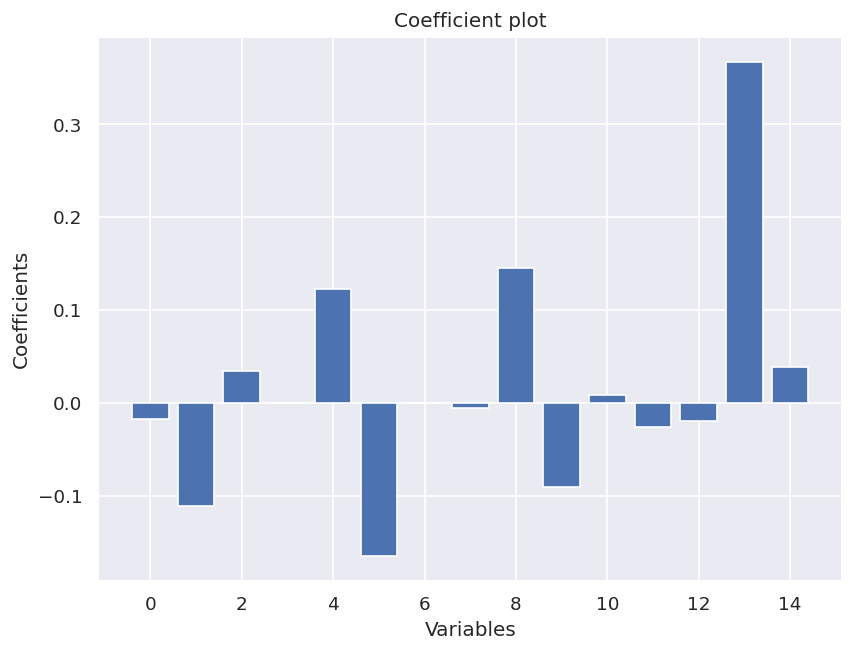

In [62]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

#### XGBoost

In [63]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = XGBClassifier(max_depth=7, n_estimators=200)
model.fit(X_train, y_train)
print('Train_Error:',((model.predict(X_train) - y_train) == 0).sum()*100/len(y_train))
print('CV_Error:',((model.predict(X_test) - y_test) == 0).sum()*100/len(y_test),'\n')

Train_Error: 79.40314831451896
CV_Error: 74.35406698564593 



#### LGBoost

##### References
https://github.com/SudalaiRajkumar/ML/blob/master/AV_LTFS_April2019/ModelBuild.ipynb

In [0]:
train_X=X
train_y=y
test_X=test

In [0]:
def runLGB(train_X, train_y, test_X, test_y=None, test_X2=None, dep=8, seed=0, data_leaf=200):
    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = dep
    params["num_leaves"] = 30
    params["min_data_in_leaf"] = data_leaf
    params["learning_rate"] = 0.03
    params["bagging_fraction"] = 0.8
    params["feature_fraction"] = 0.35
    params["feature_fraction_seed"] = seed
    params["bagging_freq"] = 1
    params["bagging_seed"] = seed
    params["lambda_l2"] = 5
    params["lambda_l1"] = 5
    params["verbosity"] = -1
    num_rounds = 25000

    plst = list(params.items())
    lgtrain = lgb.Dataset(train_X, label=train_y)

    if test_y is not None:
        lgtest = lgb.Dataset(test_X, label=test_y)
        model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=200, verbose_eval=500)
    else:
        lgtest = lgb.DMatrix(test_X)
        model = lgb.train(params, lgtrain, num_rounds)

    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_test_y2 = model.predict(test_X2, num_iteration=model.best_iteration)

    loss = 0
    if test_y is not None:
        loss = metrics.roc_auc_score(test_y, pred_test_y)
        print(loss)
        return model, loss, pred_test_y, pred_test_y2
    else:
        return model, loss, pred_test_y, pred_test_y2

In [67]:
print("Building model..")
cv_scores = []
pred_test_full = 0
pred_train = np.zeros(train_X.shape[0])
n_splits = 3
#kf = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=7988)
gkf = model_selection.GroupKFold(n_splits=n_splits)
model_name = "lgb"
for dev_index, val_index in gkf.split(train_X, train["is_pass"].values, train["id"].values):
    dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val = 0
    pred_test = 0
    n_models = 0.

    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=8, seed=2019)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=7, data_leaf=100, seed=9873)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=9, data_leaf=150, seed=4568)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    pred_val /= n_models
    pred_test /= n_models
    
    loss = metrics.roc_auc_score(val_y, pred_val)
        
    pred_train[val_index] = pred_val
    pred_test_full += pred_test / n_splits
    cv_scores.append(loss)
#     break
print(np.mean(cv_scores))

Building model..
Training until validation scores don't improve for 200 rounds.
[500]	valid_0's auc: 0.747969
[1000]	valid_0's auc: 0.755397
[1500]	valid_0's auc: 0.7592
[2000]	valid_0's auc: 0.761868
[2500]	valid_0's auc: 0.763851
[3000]	valid_0's auc: 0.765317
[3500]	valid_0's auc: 0.766545
[4000]	valid_0's auc: 0.767347
[4500]	valid_0's auc: 0.768167
[5000]	valid_0's auc: 0.769059
[5500]	valid_0's auc: 0.769794
[6000]	valid_0's auc: 0.770603
[6500]	valid_0's auc: 0.771218
[7000]	valid_0's auc: 0.771802
[7500]	valid_0's auc: 0.772263
[8000]	valid_0's auc: 0.772615
[8500]	valid_0's auc: 0.773076
[9000]	valid_0's auc: 0.773556
[9500]	valid_0's auc: 0.773923
[10000]	valid_0's auc: 0.774251
[10500]	valid_0's auc: 0.774592
[11000]	valid_0's auc: 0.774996
[11500]	valid_0's auc: 0.775281
[12000]	valid_0's auc: 0.775596
[12500]	valid_0's auc: 0.775953
[13000]	valid_0's auc: 0.776047
[13500]	valid_0's auc: 0.776179
Early stopping, best iteration is:
[13329]	valid_0's auc: 0.776227
0.776226758

In [0]:
sub_df = pd.DataFrame(sample[["id"]])
sub_df["is_pass"] = pred_test_full
sub_df.to_csv("Solution.csv", index=False)

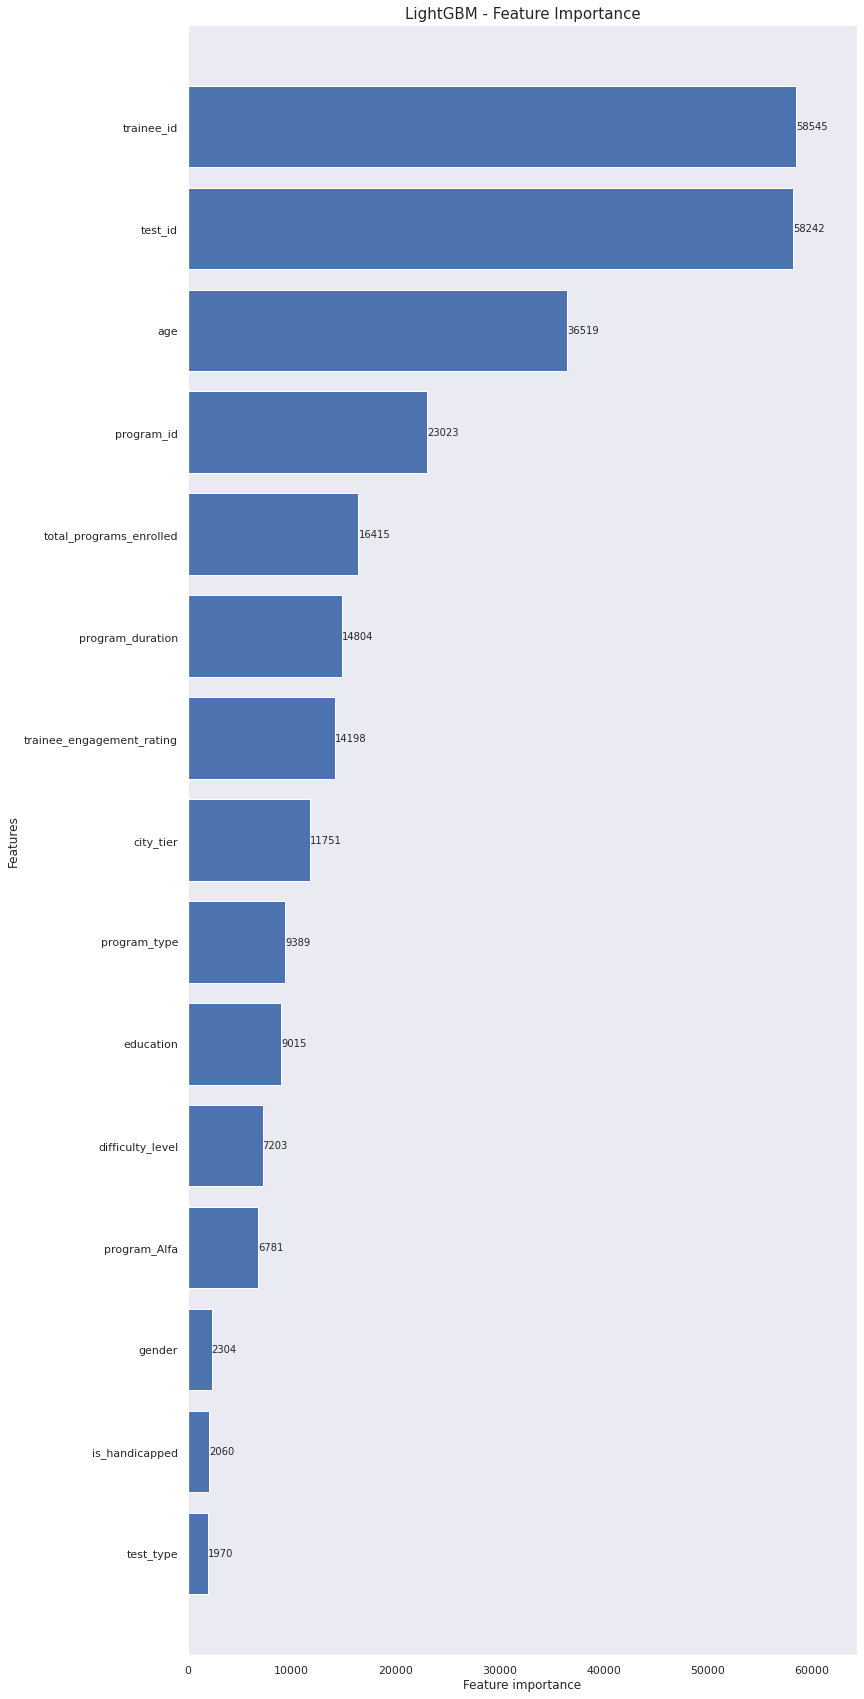

In [69]:
fig, ax = plt.subplots(figsize=(12,30))
lgb.plot_importance(model, max_num_features=100, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [70]:
sub_df.head(15)

,id,is_pass
0,1626_45,0.603292
1,11020_130,0.934987
2,12652_146,0.740516
3,7038_72,0.016603
4,888_71,0.185953
5,18922_62,0.443299
6,5499_29,0.927039
7,10150_125,0.868038
8,10158_95,0.764661
9,6215_17,0.937126
